# Vector Auoregressive (VAR) Models

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.tsa.api import VAR

# Load the input files
money_int_rates = pd.read_excel("./Data/Money_Interest_Rate.xlsx")[["year", "M1", "R"]]
money_int_rates.head()

,year,M1,R
0,1979–1,22175.0,11.13333
1,1979–2,22841.0,11.16667
2,1979–3,23461.0,11.80000
3,1979–4,23427.0,14.18333
4,1980–1,23811.0,14.38333


In [23]:
money_int_rates_train = money_int_rates[0:36]
money_int_rates_test = money_int_rates[36:]

# Fit the VAR Model by treating Money Supply and Interest Rates dependent on each other. 

I used AIC information criteria method to set for the appropriate lag variables

In [24]:
money_int_rates_model = VAR(np.asarray(money_int_rates_train[["M1", "R"]]))
result = money_int_rates_model.fit(ic = 'aic')
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 24, Nov, 2020
Time:                     14:33:57
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.7547
Nobs:                     34.0000    HQIC:                   13.4589
Log likelihood:          -312.686    FPE:                    603251.
AIC:                      13.3058    Det(Omega_mle):         458487.
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const      1451.912194      1185.604374            1.225           0.221
L1.y1         1.037546         0.160485            6.465           0.000
L1.y2      -234.878075        45.522771           -5.160           0.000
L2.y1        -0.044668

# Forecast Money Supply and Interest Rates using VAR Models

In [30]:
forecast = result.forecast(np.asarray(money_int_rates_test[["M1", "R"]]),4)
forecast

array([[3.87260220e+04, 8.92780229e+00],
       [3.95511031e+04, 6.91125590e+00],
       [4.05646712e+04, 5.77364544e+00],
       [4.15236885e+04, 5.07898554e+00]])

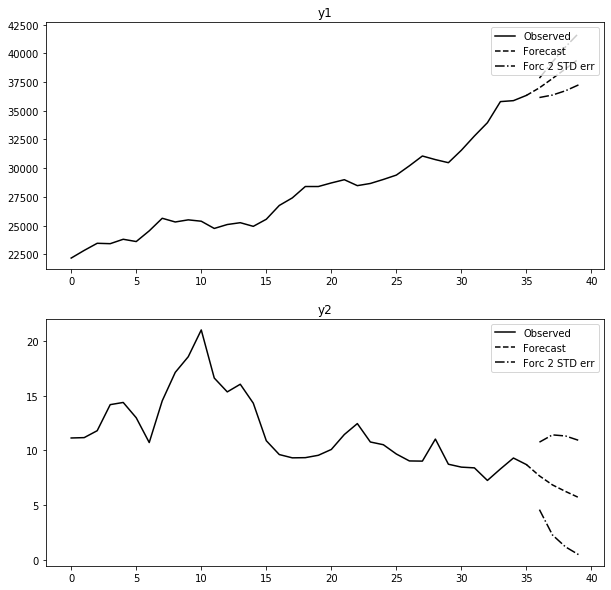

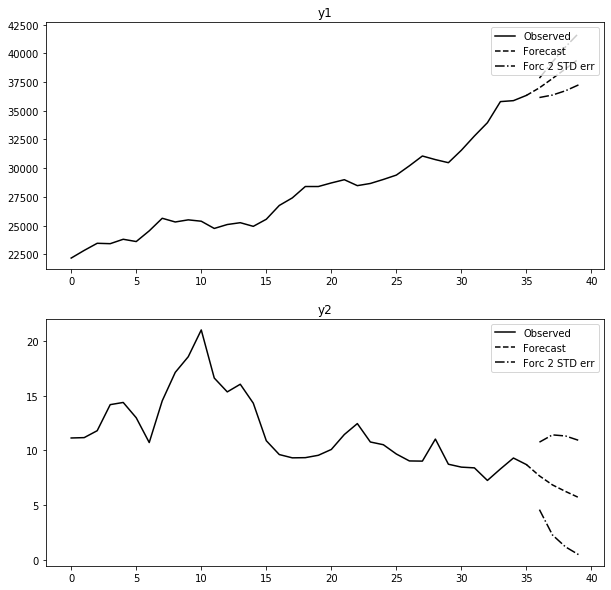

In [31]:
result.plot_forecast(4)

All else being equal, a larger money supply lowers market interest rates, making it less expensive for consumers to borrow. Conversely, smaller money supplies tend to raise market interest rates, making it pricier for consumers to take out a loan.